In [102]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
# import time
%matplotlib inline

In [103]:
plt.rcParams["font.family"] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

data = pd.read_csv('SLOWDATA2024_06_14 (0-400C 5bar 240V).xlsx - Slow.csv')
data

,Time,Chamber Pressure [Bar],N2 Pressure [Bar],Leakage Rate [Bar/Min],Wall Temp [C],Coolant In Temp [C],Coolant Out Temp [C],Injector Temp [C],Internal Temp [C],Pressure Temp [C],Rate of Temp Change [C/min],Heater On
0,06/14/2024 09:51:17.967 AM,-0.714564,0.460857,-35.413521,23.064198,43.155113,42.873543,39.740940,22.271313,21.721035,0.158998,0
1,06/14/2024 09:51:30.368 AM,-0.726509,0.379629,7.334465,23.095375,43.147305,42.871941,39.824303,22.919765,21.738733,0.234329,0
2,06/14/2024 09:51:31.368 AM,-0.865076,0.327069,-0.414943,23.099714,43.146435,42.869293,39.837471,22.935989,21.737471,0.165073,0
3,06/14/2024 09:51:32.367 AM,-0.769514,0.312734,0.141217,23.102171,43.146721,42.876144,39.847359,22.949997,21.736155,0.049442,0
4,06/14/2024 09:51:33.367 AM,5.750254,0.360515,58.083664,23.108519,43.145164,42.872459,39.862682,23.489559,21.744608,0.369372,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3879,06/14/2024 10:56:08.368 AM,4.945138,0.415464,-0.101033,148.982849,43.446690,43.673023,57.542637,143.374283,52.231194,-2.472922,0
3880,06/14/2024 10:56:09.368 AM,4.906913,0.353349,-0.132748,148.921341,43.445187,43.647774,57.522022,143.226181,52.215244,-3.322356,0
3881,06/14/2024 10:56:10.368 AM,4.923637,0.420243,-0.154810,148.861313,43.442051,43.665371,57.528919,143.295715,52.201248,-3.492189,0
3882,06/14/2024 10:56:11.367 AM,4.892580,0.377240,-0.185053,148.801437,43.444912,43.654942,57.545265,143.006943,52.184315,-3.651886,0


In [104]:
fs = 1 # slow sampling freq (Hz)
fc = 1/60 # cutoff freq (Hz)
Wn = fc / (fs / 2) # normalize freq
N = 2
b, a = signal.butter(N, Wn, 'low')
dTdt_filtered = signal.filtfilt(b, a, data['Rate of Temp Change [C/min]'])

In [105]:
# this turns out to be unnecessary. Useful technique though
# init = time.strptime(data['Time'][1], "%m/%d/%Y %I:%M:%S.%f %p")
# init = time.mktime(init)


# timeobj = np.ones(len(data['Time']))
# for i in range(len(data['Time'])):
#     temp = time.strptime(data['Time'][i], "%m/%d/%Y %I:%M:%S.%f %p")
#     timeobj[i] = time.mktime(temp) - init

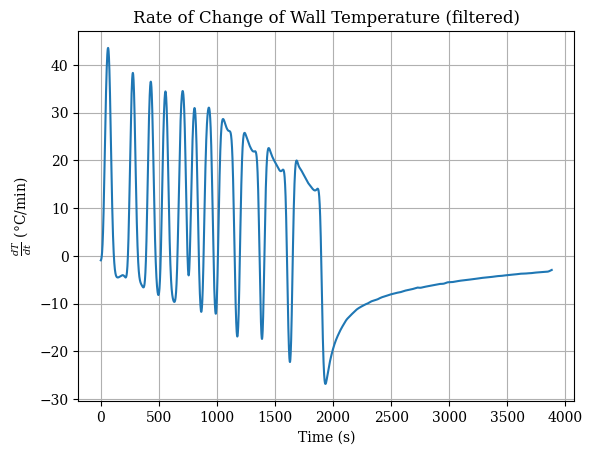

In [106]:
timeobj = np.arange(0, len(data['Time']), 1)
plt.plot(timeobj, dTdt_filtered)
plt.title('Rate of Change of Wall Temperature (filtered)')
plt.xlabel('Time (s)')
plt.ylabel(r'$\frac{dT}{dt}$ (°C/min)')
plt.grid()

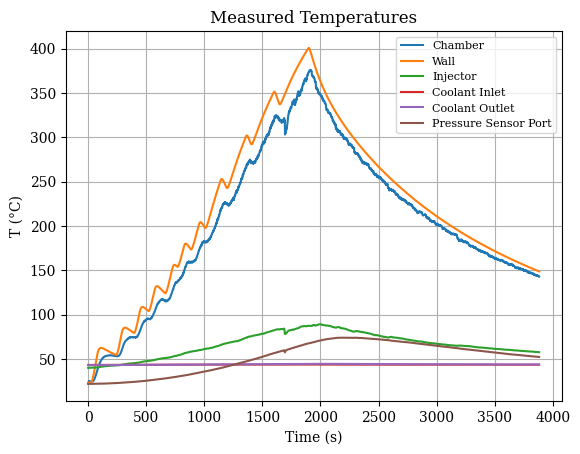

In [107]:
plt.plot(timeobj, data['Internal Temp [C]'], label='Chamber')
plt.plot(timeobj, data['Wall Temp [C]'], label='Wall')
plt.plot(timeobj, data['Injector Temp [C]'], label='Injector')
plt.plot(timeobj, data['Coolant In Temp [C]'], label='Coolant Inlet')
plt.plot(timeobj, data['Coolant Out Temp [C]'], label='Coolant Outlet')
plt.plot(timeobj, data['Pressure Temp [C]'], label='Pressure Sensor Port')
plt.title('Measured Temperatures')
plt.xlabel('Time (s)')
plt.ylabel('T (°C)')
plt.legend(fontsize=8)
plt.grid()